In this assignment, you will create effective data visualizations for a given dataset using Python libraries like Matplotlib, Seaborn, or Plotly. You will apply principles of chart design to evaluate and improve the effectiveness of data visualizations, and communicate data insights to a specific audience using appropriate language and visual cues.

Instruction Prompts:

1. Locate a dataset (e.g., from Kaggle, UCI Machine Learning Repository) from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, or use one provided by your instructor. The dataset should include at least 8 variables or different types.
2. Using Python and appropriate data visualization libraries, create at least two different visualizations for each variable in the dataset selected in Prompt 1 above. Your visualizations should include at least one bar chart, one line chart, one scatter plot, and one histogram.
3. Evaluate the effectiveness of your visualizations and identify at least two areas for improvement based on principles of chart design (e.g., clarity, simplicity, consistency).
4. Using your improved visualizations, create a final report that communicates data insights to a specific audience. The report should include appropriate language and visual cues for the intended audience.

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#read breast cancer csv
data = pd.read_csv('Breast_Cancer.csv')

In [3]:
#convert data to pandas dataframe
df = pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
df = df.drop(['Marital Status','T Stage ','6th Stage','differentiate','A Stage', 'Status'], axis=1)

In [6]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


<AxesSubplot:>

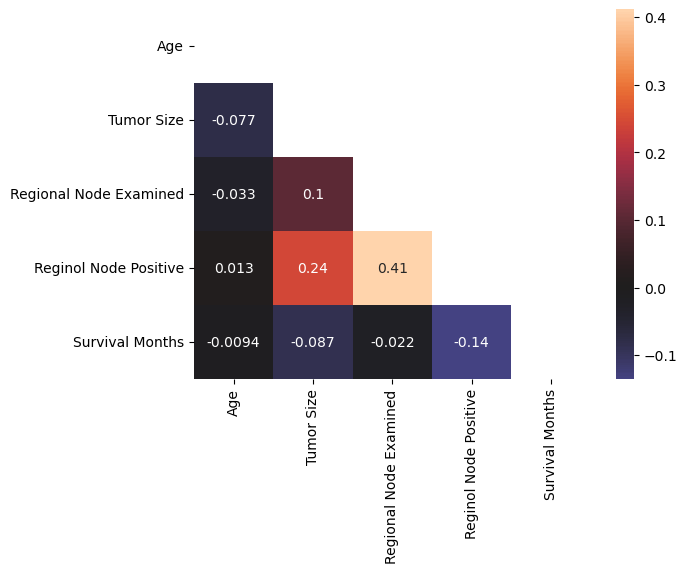

In [7]:
#use correlation matrix and heatmap to identify relational features
cmatrix= data.corr()
mask = np.triu(df.corr()) #allows us to only display lower triangle of heatmap
sns.heatmap(cmatrix,annot=True, center=0, mask=mask)

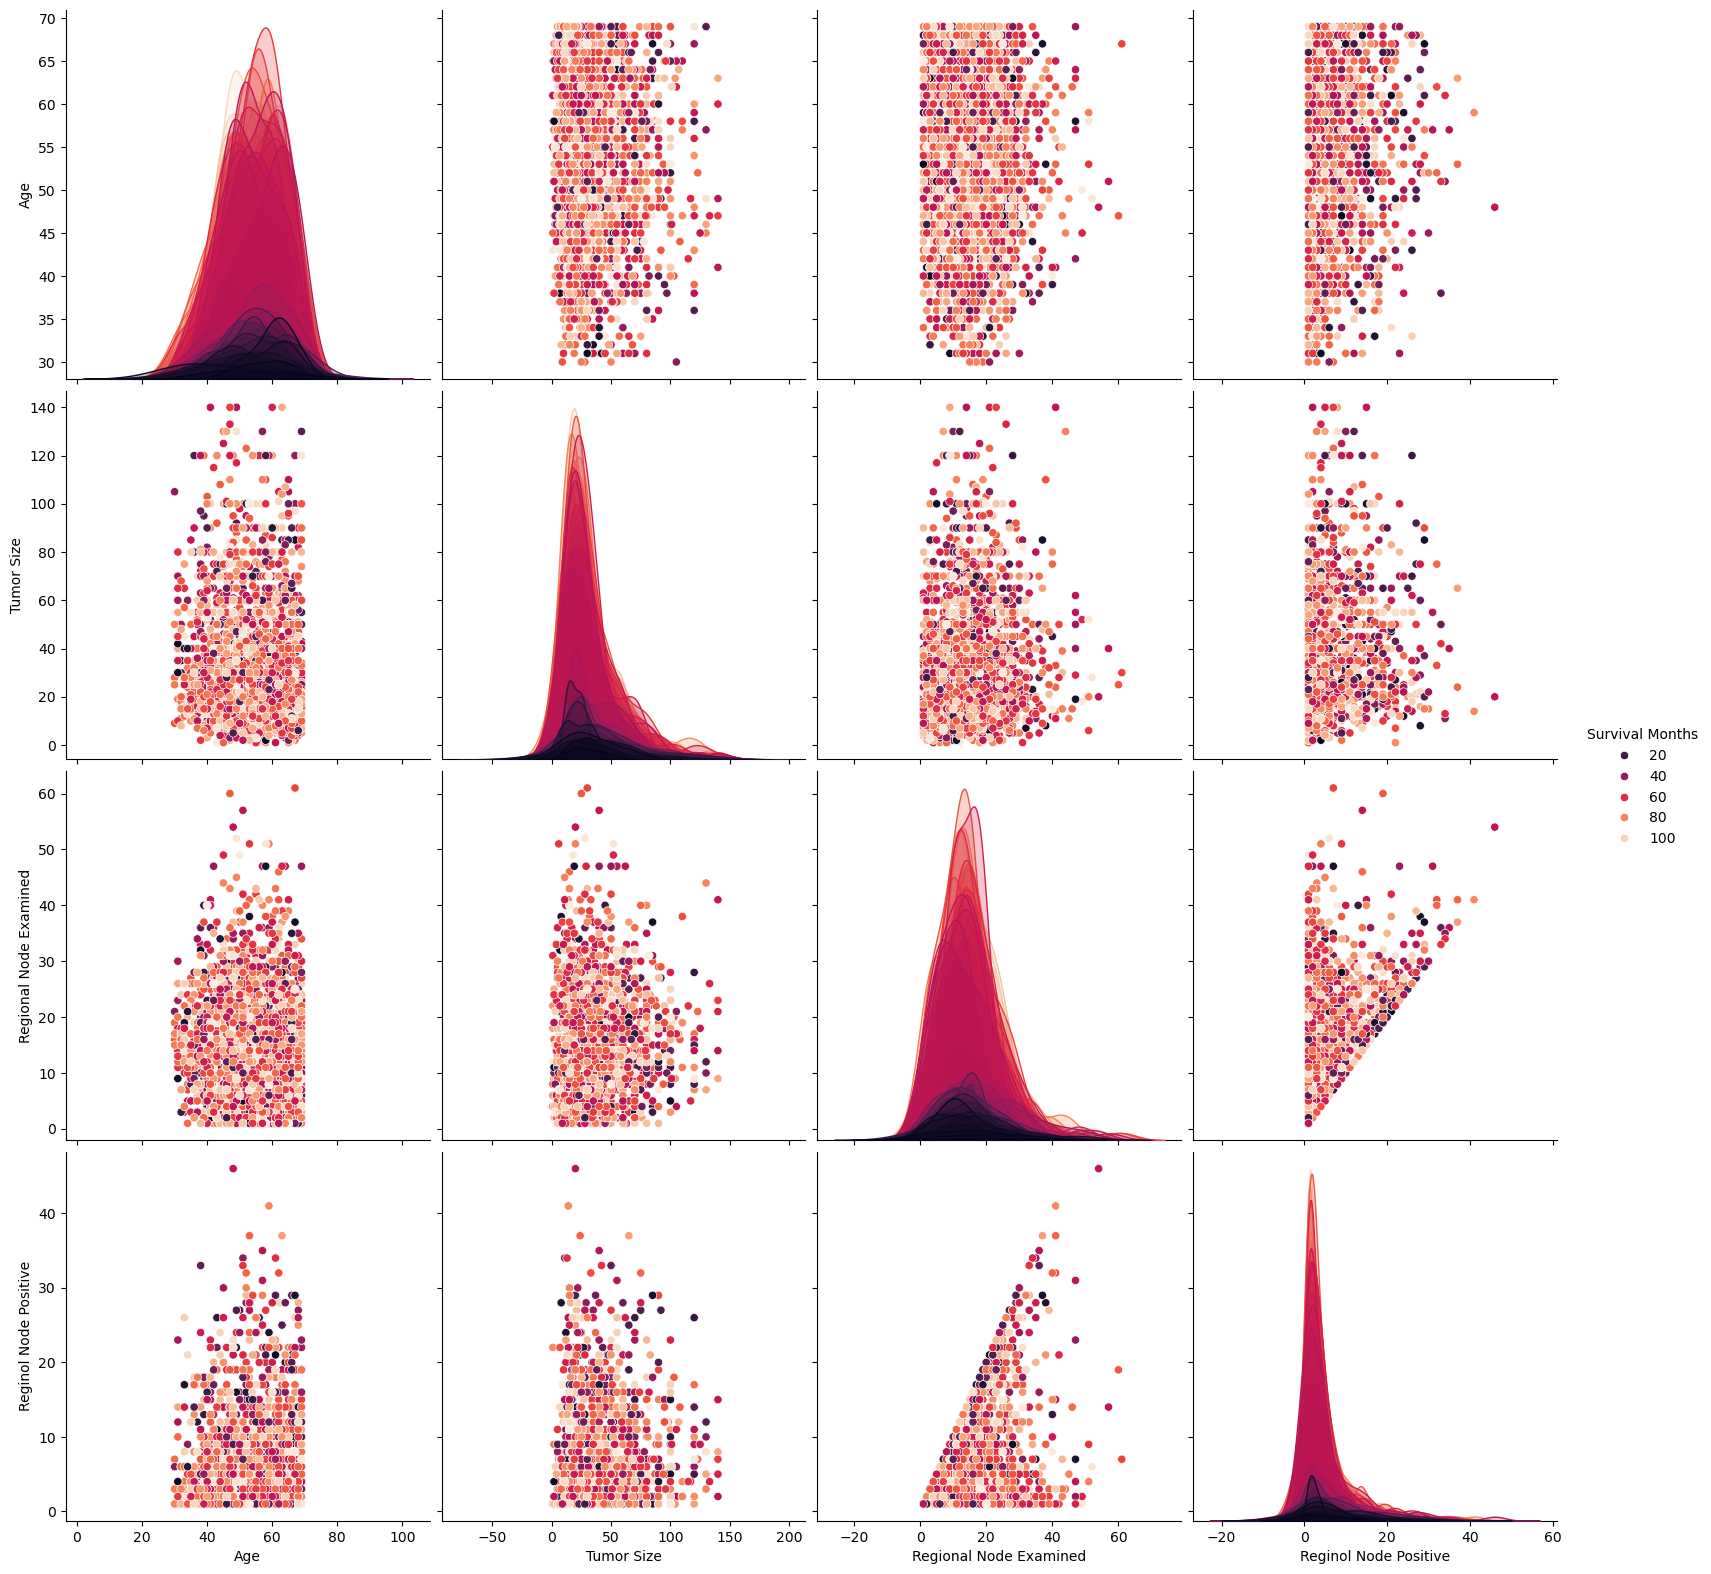

In [8]:
sns.pairplot(data=df,height=4, hue='Survival Months', palette = 'rocket')

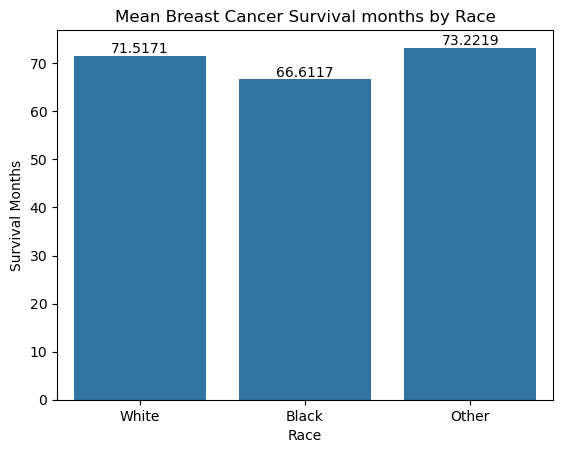

In [9]:
ax = sns.barplot(df, x='Race', y='Survival Months',errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_title('Mean Breast Cancer Survival months by Race')
plt.show()

This is a bar chart to show difference in survival months for breast cancer patients in this study by race. A clinical and quality care team can use this data to recognize biases in care. While there is a 6 month discrepancy in survival months between white and black patients there is also a gap between these and other classified race. To help visualize and understand a clinically significant gap, we can use statistical methods to investigate further. 

In [10]:
df['Survival Months'].describe()

count    4024.000000
mean       71.297962
std        22.921430
min         1.000000
25%        56.000000
50%        73.000000
75%        90.000000
max       107.000000
Name: Survival Months, dtype: float64

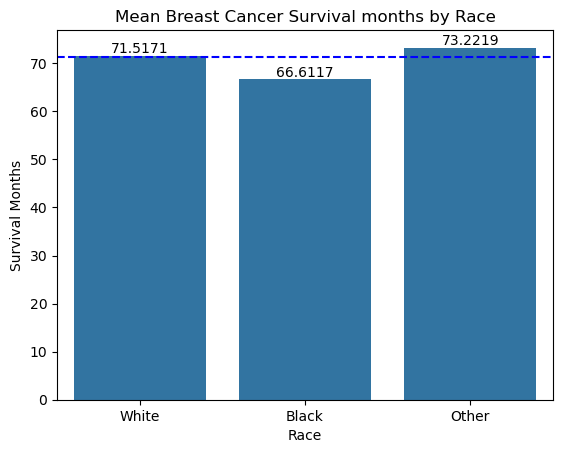

In [11]:
ax = sns.barplot(df, x='Race', y='Survival Months',errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_title('Mean Breast Cancer Survival months by Race')
plt.axhline(y=df['Survival Months'].mean(),color='blue', ls='--', label = 'Mean')
plt.show()

We improved on Figure 1 by adding a mean line to help visualize the inference between survival months. 

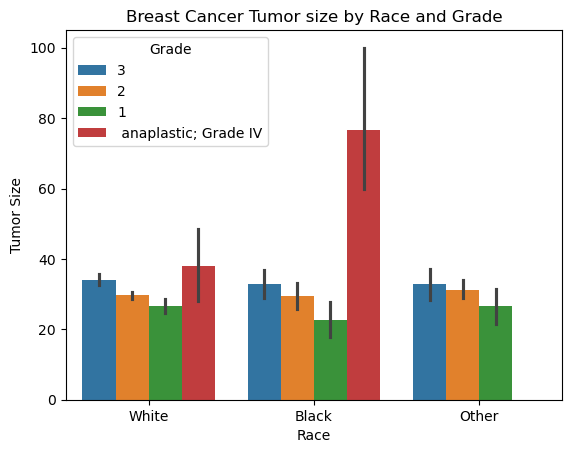

In [12]:
ax2 = sns.barplot(df, x='Race', y='Tumor Size', hue='Grade')
ax2.set_title('Breast Cancer Tumor size by Race and Grade')
plt.show()

Another way to extract meaningful insights from race in our data set is to look at tumor size and grade. The history of bias in healthcare has created mistrust in the system. Many minorities wait to seek care due in part to the mistrust in the system. Here we can see this may be the case for minorities in our data set. This hospital system could implement outreach and education to their catchment area.

As for the visualization itself, the grading is not in order which can cause confusion. Let's fix this. 

In [13]:
df['Grade'].value_counts()

2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

In [14]:
#rename grading to be more uniform
grades = {'1':'I','2':'II','3':'III',' anaplastic; Grade IV':'IV'}
df['Grade'] = df['Grade'].map(grades)

#define levels for sorting
levels= ('I','II','III','IV')

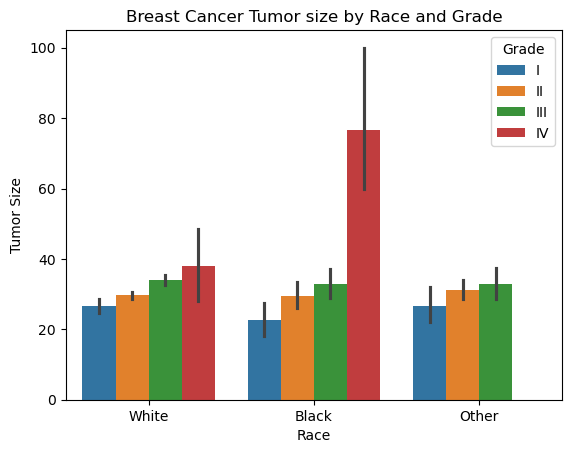

In [15]:
#create improved plot on breast cancer tumor size and grade by race
ax3 = sns.barplot(df, x='Race', y='Tumor Size', hue='Grade', hue_order=levels)
ax3.set_title('Breast Cancer Tumor size by Race and Grade')
plt.show()

<AxesSubplot:xlabel='Reginol Node Positive', ylabel='Tumor Size'>

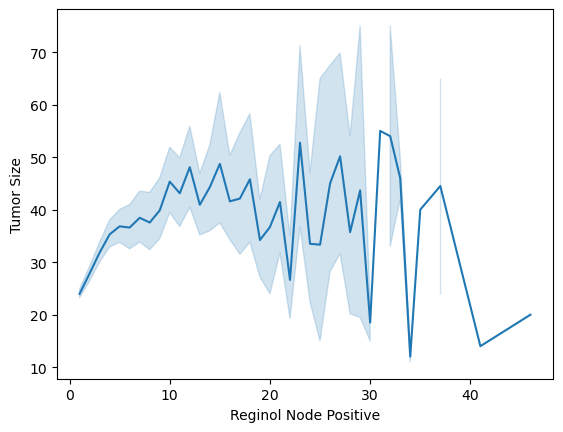

In [16]:
sns.lineplot(data=df, x='Reginol Node Positive', y = 'Tumor Size')

The plot above shows tumor size compared to count of potive regional nodes

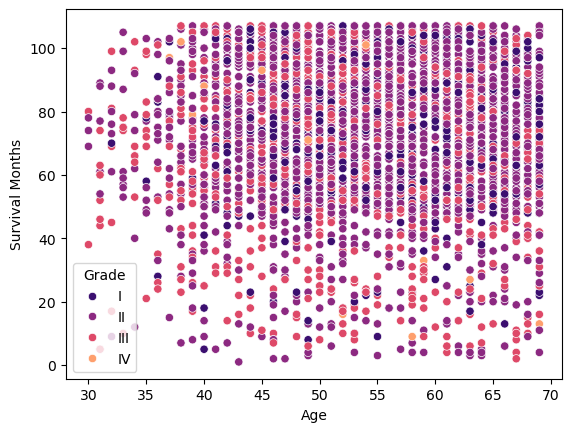

In [17]:
ax5 = sns.scatterplot(data=df, x='Age',y='Survival Months',hue='Grade', hue_order = levels,palette='magma')

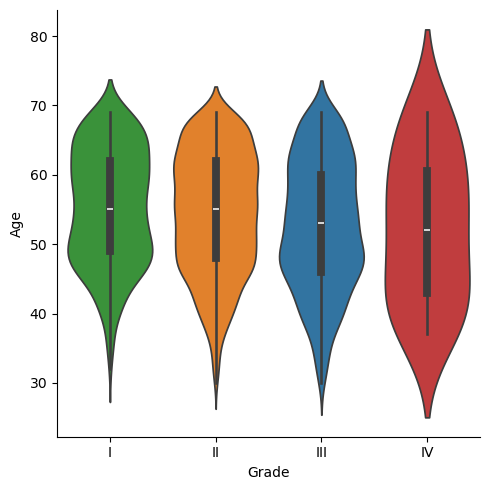

In [18]:
ax4 = sns.catplot(data=df, x='Grade', y='Age', hue='Grade', kind='violin', order=levels)

The plot above shows how we can use plots to show us that there is no obvious correlation between features in a datset. Age and Grade do not have a correlation with Survival months. Since Grade is usually an indicator of prognosis, Lets look closer at this variable.

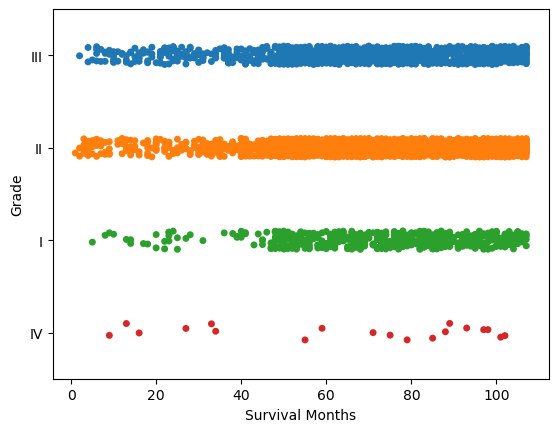

In [19]:
ax6 = sns.stripplot(data=df, x='Survival Months', y='Grade', hue='Grade')

The plot above again confirms with visualization, no correlation between grade and survival months. This could be due to a combination of population size within each category and innovations in medicine.

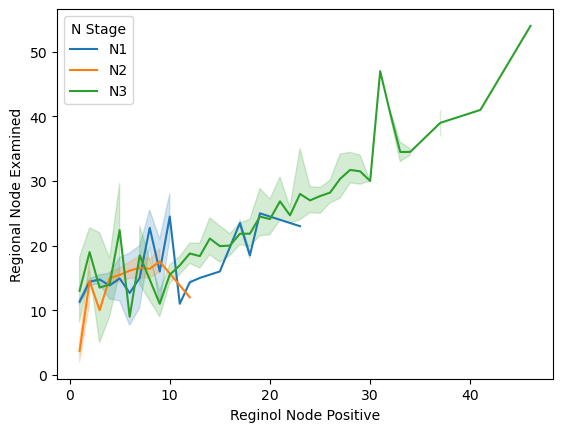

In [20]:
ax7 = sns.lineplot(data=df, x='Reginol Node Positive',y='Regional Node Examined',hue='N Stage')

Of the nodes examined it makes since that we see a positive correlation between number of nodes examined and the number of nodes marked as positive. It also makes since that we see a difference in line size for each node grade. The higher the node grade, the more widespread nodes are. From this plot we can see that patients with grade 3 nodes have a higher variation at lower amounts of nodes examined and being found as positive.

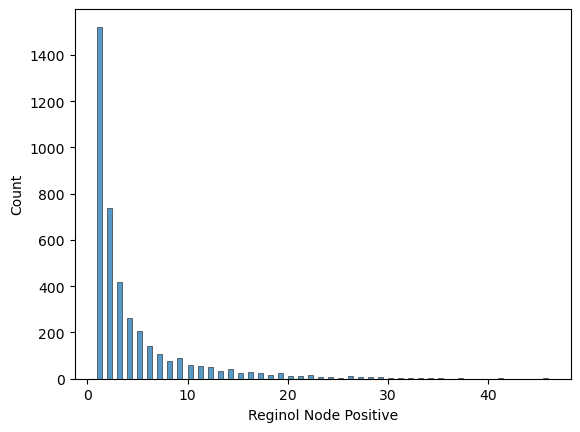

In [21]:
ax8 = sns.histplot(df, x='Reginol Node Positive')

A histogram aids our visualization in seeing that the majority of our patients had under 10 positive nodes. 

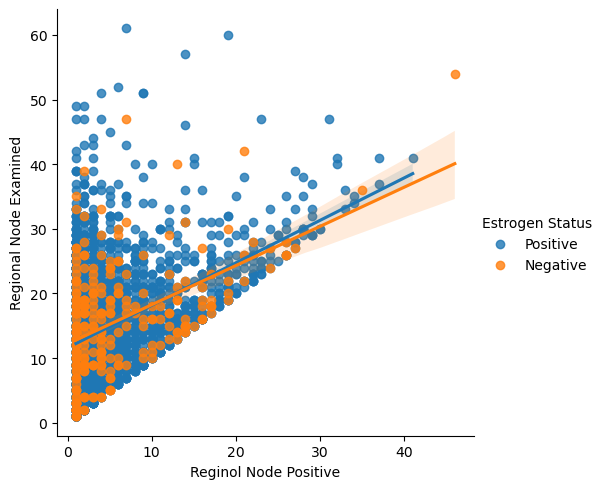

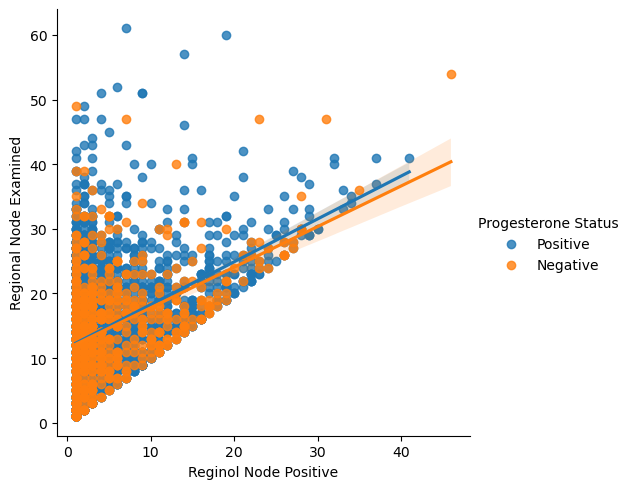

In [22]:
ax9 = sns.lmplot(data=df, x='Reginol Node Positive', y='Regional Node Examined', hue='Estrogen Status')
ax10 = sns.lmplot(data=df, x='Reginol Node Positive', y='Regional Node Examined', hue='Progesterone Status')

The plots above can be used to compare nodes by progesterone and estrogen status. Seaborns’ lmplot was used to fit a regression line for both hormone statuses. The plots above can be used to compare nodes by progesterone and estrogen status. We can see in both node hormone statuses, that negative hormone status is clustered near the low end of positive nodes. This makes sense due to most of the patients in our dataset having under 10 positive nodes. We can also see that most of the cases in our dataset are estrogen positive. This data can help hospital centers develop and supply treatment plans at scale based on the individual. 

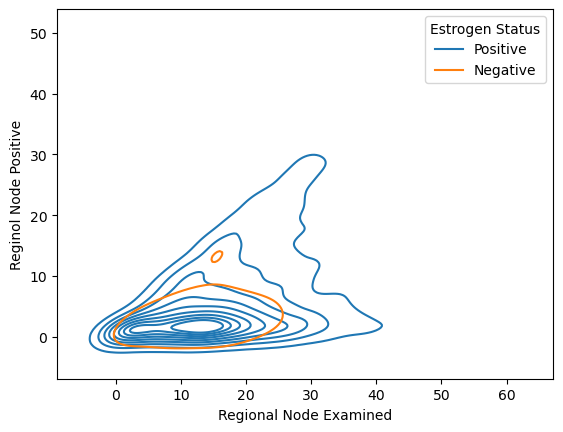

In [23]:
ax11 = sns.kdeplot(data=df,x='Regional Node Examined', y='Reginol Node Positive', hue='Estrogen Status')

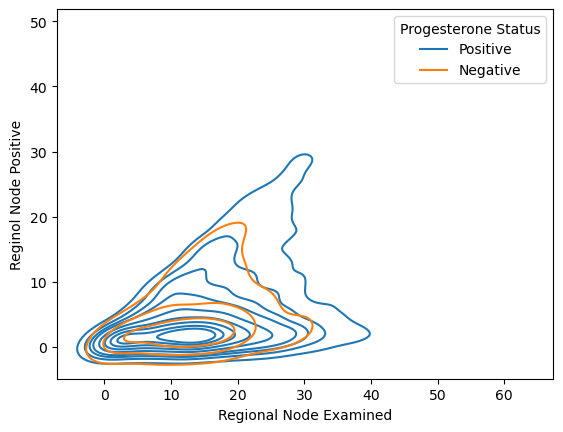

In [24]:
ax12 = sns.kdeplot(data=df,x='Regional Node Examined', y='Reginol Node Positive', hue='Progesterone Status')

Here we visualize node counts and positive nodes by hormone status using Seaborns’ kde plot. This plot helps to better visualize the distributions of positive versus negative nodes in the dataset.

Koehrsen, W. (2018, April 6). Visualizing data with pairs plots in Python. Medium. https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166 
Matplotlib.pyplot. matplotlib.pyplot - Matplotlib 3.8.3 documentation. (n.d.). https://matplotlib.org/stable/api/pyplot_summary.html
Namdari, R. (2022, August 8). Breast cancer. Kaggle. https://www.kaggle.com/datasets/reihanenamdari/breast-cancer
Waskom, M. L., (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, https://doi.org/10.21105/joss.03021.